In [1]:
#Import Turing, Distributions, LinearAlgebra and DataFrames
using Turing, Distributions, StatsBase

# Import MCMCChain, Plots, StatsPlots, GraphPlot, GraphRecipes, PyCall and Statistics for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: Recompiling stale cache file /home/saumya/.julia/compiled/v1.1/Turing/gm4QC.ji for Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/saumya/.julia/compiled/v1.1/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184
┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [2]:
N = 500
s = zeros(N)
for i=3:N
    s[i] = s[i - 1]*0.4 + s[i - 2]*0.5 + rand(Normal(0, 1))
end

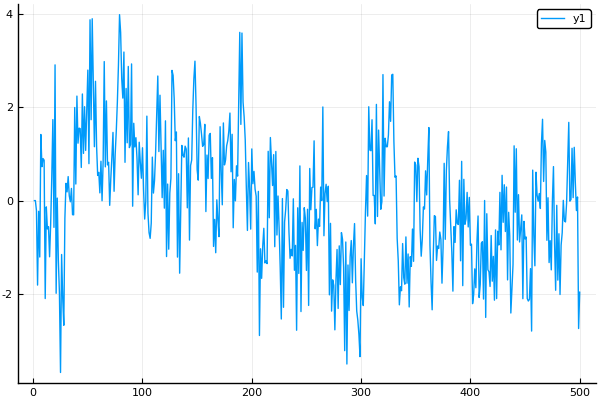

In [3]:
pyplot()
plot(s)

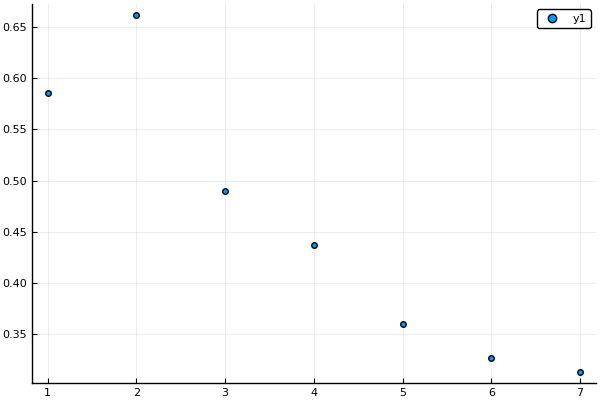

In [4]:
scatter([1, 2, 3, 4, 5, 6, 7], autocor(s, [1, 2, 3, 4, 5, 6, 7]))

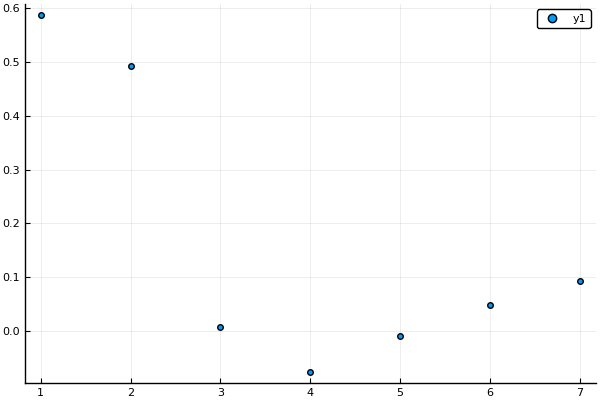

In [5]:
scatter([1, 2, 3, 4, 5, 6, 7], pacf(s, [1, 2, 3, 4, 5, 6, 7]))

In [6]:
σ = 10
@model AR1(x, N) = begin
    α ~ Normal(0,σ) 
    beta_1 ~ Uniform(-1, 1)
    beta_2 ~ Uniform(-1, 1)
    for t in 3:N
        μ = α + beta_1 * x[t-1] + beta_2 * x[t - 2] 
        x[t] ~ Normal(μ, 0.1) 
    end
end;

In [7]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sample using HMC
chain = sample(AR1(s, N), NUTS(500, 200, 0.65) )

┌ Info: [Turing] looking for good initial eps...
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:247
┌ Info: [Turing] found initial ϵ: 0.008999729156494144
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:239
┌ Info:  Adapted ϵ = 0.007840757304024617, std = [1.0, 1.0, 1.0]; 200 iterations is used for adaption.
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/adapt/adapt.jl:90


[NUTS] Finished with
  Running time        = 9.012023851999999;
  #lf / sample        = 0.0;
  #evals / sample     = 0.002;
  pre-cond. metric    = [1.0, 1.0, 1.0].


Object of type Chains, with data of type 500×9×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = beta_1, α, beta_2

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean        │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64     │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼─────────────┼───────────┼─────────────┼─────────────┤
│ 1   │ beta_1     │ 0.301789    │ 0.0124504 │ 0.000556798 │ 0.000593447 │
│ 2   │ beta_2     │ 0.49147     │ 0.0152164 │ 0.000680499 │ 0.00129701  │
│ 3   │ α          │ -0.00789606 │ 0.18694   │ 0.00836021  │ 0.00105601  │

Quantiles
. Omitted printing of 1 columns
│ Row │ parameters │ 2.5%       │ 25.0%      │ 50.0%       │ 75.0%       │
│     │ Symbol     │ Float64    │ Float

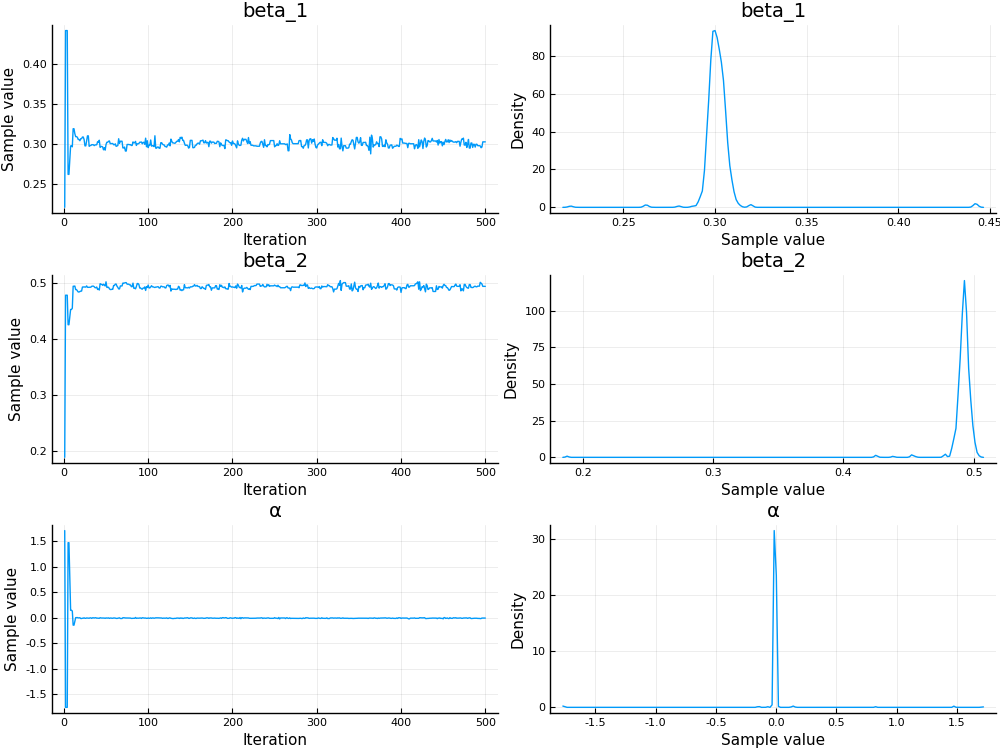

In [8]:
plot(chain)

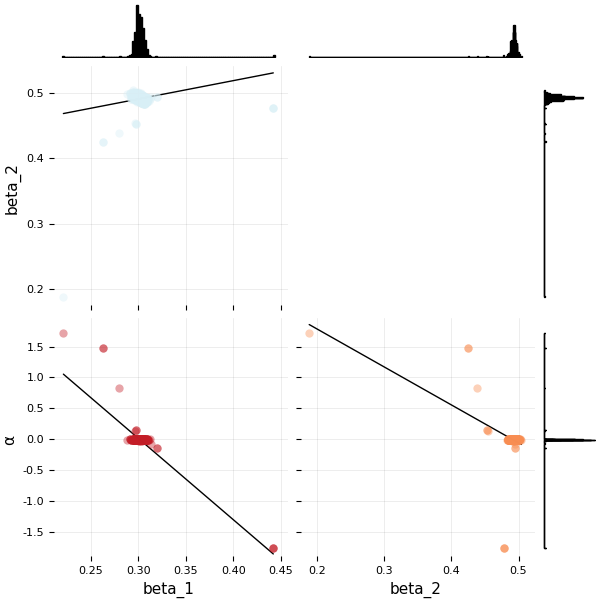

In [13]:
corner(chain)